In [1]:
!pip install feature_engine -q
!pip install MissForest -q

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from missforest.missforest import MissForest
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures

In [3]:
df = pd.read_csv('/kaggle/input/world-export-and-import-dataset/34_years_world_export_import_dataset.csv')
df.head(4)

,Partner Name,Year,Export (US$ Thousand),Import (US$ Thousand),Export Product Share (%),Import Product Share (%),Revealed comparative advantage,World Growth (%),Country Growth (%),AHS Simple Average (%),...,MFN Total Tariff Lines,MFN Dutiable Tariff Lines Share (%),MFN Duty Free Tariff Lines Share (%),MFN Specific Tariff Lines Share (%),MFN AVE Tariff Lines Share (%),MFN MaxRate (%),MFN MinRate (%),MFN SpecificDuty Imports (US$ Thousand),MFN Dutiable Imports (US$ Thousand),MFN Duty Free Imports (US$ Thousand)
0,Aruba,1988,3498.10,328.49,100.0,100,NaN,NaN,NaN,2.80,...,1152.0,63.54,22.74,70.32,31.61,352.69,0.0,2186.00,3128.02,0.0
1,Afghanistan,1988,213030.40,54459.52,100.0,100,NaN,NaN,NaN,0.88,...,4142.0,69.41,15.64,72.45,40.51,2029.66,0.0,78436.91,94191.50,0.0
2,Angola,1988,375527.89,370702.76,100.0,100,NaN,NaN,NaN,2.02,...,5438.0,76.00,16.27,41.55,24.80,451.15,0.0,727741.99,921481.52,0.0
3,Anguila,1988,366.98,4.00,100.0,100,NaN,NaN,NaN,3.71,...,322.0,66.15,22.05,78.79,36.36,100.00,0.0,94.00,583.00,0.0


In [4]:
df.shape

(8096, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8096 entries, 0 to 8095
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Partner Name                             8096 non-null   object 
 1   Year                                     8096 non-null   int64  
 2   Export (US$ Thousand)                    8096 non-null   float64
 3   Import (US$ Thousand)                    8096 non-null   float64
 4   Export Product Share (%)                 8076 non-null   float64
 5   Import Product Share (%)                 8096 non-null   int64  
 6   Revealed comparative advantage           4712 non-null   float64
 7   World Growth (%)                         4410 non-null   float64
 8   Country Growth (%)                       4410 non-null   float64
 9   AHS Simple Average (%)                   8080 non-null   float64
 10  AHS Weighted Average (%)                 8080 no

In [6]:
df.nunique()

Partner Name                                265
Year                                         34
Export (US$ Thousand)                      8077
Import (US$ Thousand)                      8096
Export Product Share (%)                      1
Import Product Share (%)                      1
Revealed comparative advantage                1
World Growth (%)                           2432
Country Growth (%)                         2432
AHS Simple Average (%)                     1525
AHS Weighted Average (%)                   1780
AHS Total Tariff Lines                     6828
AHS Dutiable Tariff Lines Share (%)        4881
AHS Duty Free Tariff Lines Share (%)       5117
AHS Specific Tariff Lines Share (%)         967
AHS AVE Tariff Lines Share (%)             1297
AHS MaxRate (%)                            1943
AHS MinRate (%)                              14
AHS SpecificDuty Imports (US$ Thousand)    7063
AHS Dutiable Imports (US$ Thousand)        8074
AHS Duty Free Imports (US$ Thousand)    

In [7]:
df.isna().sum()

Partner Name                                  0
Year                                          0
Export (US$ Thousand)                         0
Import (US$ Thousand)                         0
Export Product Share (%)                     20
Import Product Share (%)                      0
Revealed comparative advantage             3384
World Growth (%)                           3686
Country Growth (%)                         3686
AHS Simple Average (%)                       16
AHS Weighted Average (%)                     16
AHS Total Tariff Lines                       16
AHS Dutiable Tariff Lines Share (%)          16
AHS Duty Free Tariff Lines Share (%)         16
AHS Specific Tariff Lines Share (%)          16
AHS AVE Tariff Lines Share (%)               16
AHS MaxRate (%)                              16
AHS MinRate (%)                              16
AHS SpecificDuty Imports (US$ Thousand)      15
AHS Dutiable Imports (US$ Thousand)          15
AHS Duty Free Imports (US$ Thousand)    

In [8]:
df1 = df.drop(['Export Product Share (%)','Import Product Share (%)','Revealed comparative advantage','MFN MinRate (%)'],axis = 1)

In [9]:
def drop_highly_correlated_columns(df, correlation_threshold=0.9):
    """
    Drops columns from a DataFrame that have a correlation coefficient greater than or equal to the specified threshold.

    Args:
    df: A Pandas DataFrame.
    correlation_threshold: The correlation coefficient threshold.

    Returns:
    A Pandas DataFrame with the highly correlated columns removed.
    """
    corr_matrix = df._get_numeric_data().corr().abs()
    columns_to_drop = set()

    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] >= correlation_threshold:
                columns_to_drop.add(corr_matrix.columns[j])

    df = df.drop(columns_to_drop, axis=1)
    return df

In [10]:
df2 = drop_highly_correlated_columns(df1, 0.85)

In [11]:
df2.head(4).T

,0,1,2,3
Partner Name,Aruba,Afghanistan,Angola,Anguila
Year,1988,1988,1988,1988
Export (US$ Thousand),3498.1,213030.4,375527.89,366.98
World Growth (%),NaN,NaN,NaN,NaN
AHS Simple Average (%),2.8,0.88,2.02,3.71
AHS Weighted Average (%),2.92,1.83,3.89,1.09
AHS Dutiable Tariff Lines Share (%),18.06,8.76,25.43,6.06
AHS Specific Tariff Lines Share (%),20.0,8.03,5.37,21.21
AHS AVE Tariff Lines Share (%),1.94,0.55,0.0,0.0
AHS MaxRate (%),50.0,35.0,40.0,35.0


In [12]:
df2.shape

(8096, 22)

In [13]:
df2.columns

Index(['Partner Name', 'Year', 'Export (US$ Thousand)', 'World Growth (%)',
       'AHS Simple Average (%)', 'AHS Weighted Average (%)',
       'AHS Dutiable Tariff Lines Share (%)',
       'AHS Specific Tariff Lines Share (%)', 'AHS AVE Tariff Lines Share (%)',
       'AHS MaxRate (%)', 'AHS MinRate (%)',
       'AHS SpecificDuty Imports (US$ Thousand)',
       'AHS Duty Free Imports (US$ Thousand)', 'MFN Simple Average (%)',
       'MFN Weighted Average (%)', 'MFN Total Tariff Lines',
       'MFN Dutiable Tariff Lines Share (%)',
       'MFN Duty Free Tariff Lines Share (%)',
       'MFN Specific Tariff Lines Share (%)', 'MFN AVE Tariff Lines Share (%)',
       'MFN MaxRate (%)', 'MFN Duty Free Imports (US$ Thousand)'],
      dtype='object')

In [14]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,8096.0,2.004908e+03,9.707831e+00,1988.00,1997.0000,2005.000,2.013000e+03,2.021000e+03
Export (US$ Thousand),8096.0,1.421192e+08,9.928417e+08,0.00,427426.3825,3719682.535,2.585514e+07,2.422743e+10
World Growth (%),4410.0,3.986016e+00,1.000422e+01,-62.28,-1.4375,3.830,9.407500e+00,1.740000e+02
AHS Simple Average (%),8080.0,6.656053e+00,3.837668e+00,0.00,4.0300,6.120,8.480000e+00,4.698000e+01
AHS Weighted Average (%),8080.0,6.082833e+00,6.765269e+00,0.00,2.1000,4.700,8.050000e+00,1.977600e+02
AHS Dutiable Tariff Lines Share (%),8080.0,4.158554e+01,2.075558e+01,0.00,24.3750,40.005,5.833000e+01,1.000000e+02
AHS Specific Tariff Lines Share (%),8080.0,1.734946e+00,3.186325e+00,0.00,0.2400,0.720,1.700000e+00,6.940000e+01
AHS AVE Tariff Lines Share (%),8080.0,3.585434e+00,3.894253e+00,0.00,1.0900,2.610,4.670000e+00,6.853000e+01
AHS MaxRate (%),8080.0,1.179489e+03,1.222241e+03,0.00,135.0000,613.490,3.000000e+03,5.000000e+03
AHS MinRate (%),8080.0,2.579332e-02,5.446842e-01,0.00,0.0000,0.000,0.000000e+00,2.000000e+01


In [15]:
df2.isna().sum()

Partner Name                                  0
Year                                          0
Export (US$ Thousand)                         0
World Growth (%)                           3686
AHS Simple Average (%)                       16
AHS Weighted Average (%)                     16
AHS Dutiable Tariff Lines Share (%)          16
AHS Specific Tariff Lines Share (%)          16
AHS AVE Tariff Lines Share (%)               16
AHS MaxRate (%)                              16
AHS MinRate (%)                              16
AHS SpecificDuty Imports (US$ Thousand)      15
AHS Duty Free Imports (US$ Thousand)         15
MFN Simple Average (%)                       15
MFN Weighted Average (%)                     15
MFN Total Tariff Lines                       15
MFN Dutiable Tariff Lines Share (%)          15
MFN Duty Free Tariff Lines Share (%)         15
MFN Specific Tariff Lines Share (%)          16
MFN AVE Tariff Lines Share (%)               16
MFN MaxRate (%)                         

In [27]:
df3 = df2.copy()
mf = MissForest() # 

In [28]:
df3 = mf.fit_transform(df3)

In [29]:
df3.isna().sum()

Partner Name                               0
Year                                       0
Export (US$ Thousand)                      0
World Growth (%)                           0
AHS Simple Average (%)                     0
AHS Weighted Average (%)                   0
AHS Dutiable Tariff Lines Share (%)        0
AHS Specific Tariff Lines Share (%)        0
AHS AVE Tariff Lines Share (%)             0
AHS MaxRate (%)                            0
AHS MinRate (%)                            0
AHS SpecificDuty Imports (US$ Thousand)    0
AHS Duty Free Imports (US$ Thousand)       0
MFN Simple Average (%)                     0
MFN Weighted Average (%)                   0
MFN Total Tariff Lines                     0
MFN Dutiable Tariff Lines Share (%)        0
MFN Duty Free Tariff Lines Share (%)       0
MFN Specific Tariff Lines Share (%)        0
MFN AVE Tariff Lines Share (%)             0
MFN MaxRate (%)                            0
MFN Duty Free Imports (US$ Thousand)       0
dtype: int

In [48]:
print(f'before null values:\n mean: {df2["World Growth (%)"].mean()},\n median: {df2["World Growth (%)"].median()},\n std: {df2["World Growth (%)"].std()}\n\n')
print(f'after null values:\n mean: {df3["World Growth (%)"].mean()},\n median: {df3["World Growth (%)"].median()},\n std: {df3["World Growth (%)"].std()}')

before null values:
 mean: 3.9860158730158735,
 median: 3.83,
 std: 10.00422091571302


after null values:
 mean: 4.133271682956145,
 median: 4.095,
 std: 8.225603466429991


<Axes: xlabel='World Growth (%)', ylabel='Count'>

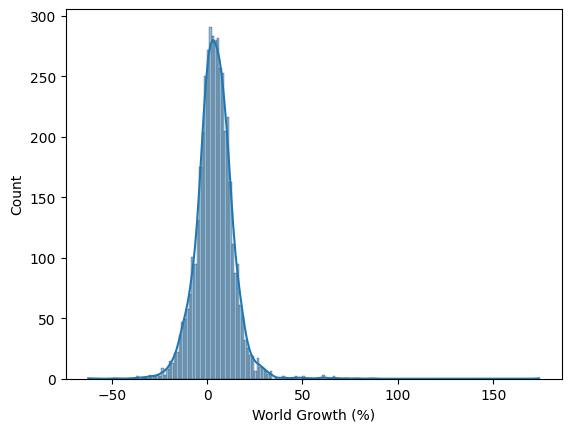

In [30]:
sns.histplot(df2,x='World Growth (%)',kde = True)

<Axes: xlabel='World Growth (%)', ylabel='Count'>

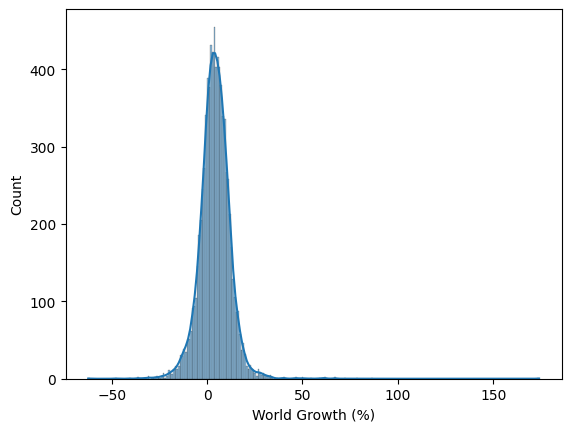

In [31]:
sns.histplot(df3,x='World Growth (%)',kde = True)

<Axes: xlabel='World Growth (%)'>

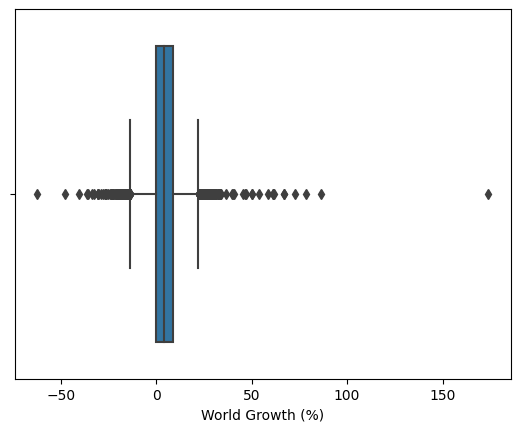

In [65]:
sns.boxplot(df3,x='World Growth (%)')

In [64]:
# |-----[  ]----|   * * * *

In [51]:
df3.columns

Index(['Partner Name', 'Year', 'Export (US$ Thousand)', 'World Growth (%)',
       'AHS Simple Average (%)', 'AHS Weighted Average (%)',
       'AHS Dutiable Tariff Lines Share (%)',
       'AHS Specific Tariff Lines Share (%)', 'AHS AVE Tariff Lines Share (%)',
       'AHS MaxRate (%)', 'AHS MinRate (%)',
       'AHS SpecificDuty Imports (US$ Thousand)',
       'AHS Duty Free Imports (US$ Thousand)', 'MFN Simple Average (%)',
       'MFN Weighted Average (%)', 'MFN Total Tariff Lines',
       'MFN Dutiable Tariff Lines Share (%)',
       'MFN Duty Free Tariff Lines Share (%)',
       'MFN Specific Tariff Lines Share (%)', 'MFN AVE Tariff Lines Share (%)',
       'MFN MaxRate (%)', 'MFN Duty Free Imports (US$ Thousand)'],
      dtype='object')

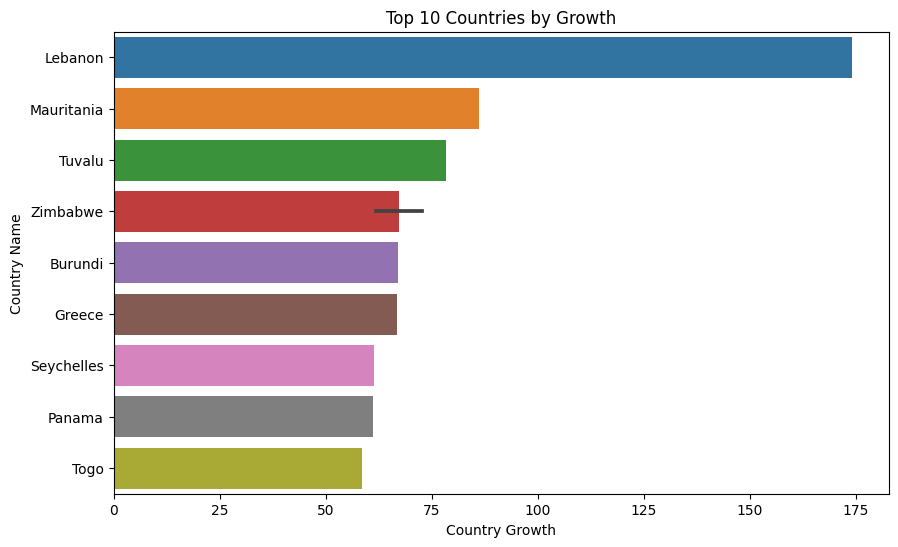

In [60]:
#Top N country in World Growth (%)
top_n = 10

top_countries = df2.sort_values(by=['World Growth (%)'], ascending=False).head(top_n)
    
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x="World Growth (%)", y="Partner Name", data=top_countries)
plt.xlabel("Country Growth")
plt.ylabel("Country Name")
plt.title(f"Top {top_n} Countries by Growth")
plt.show()

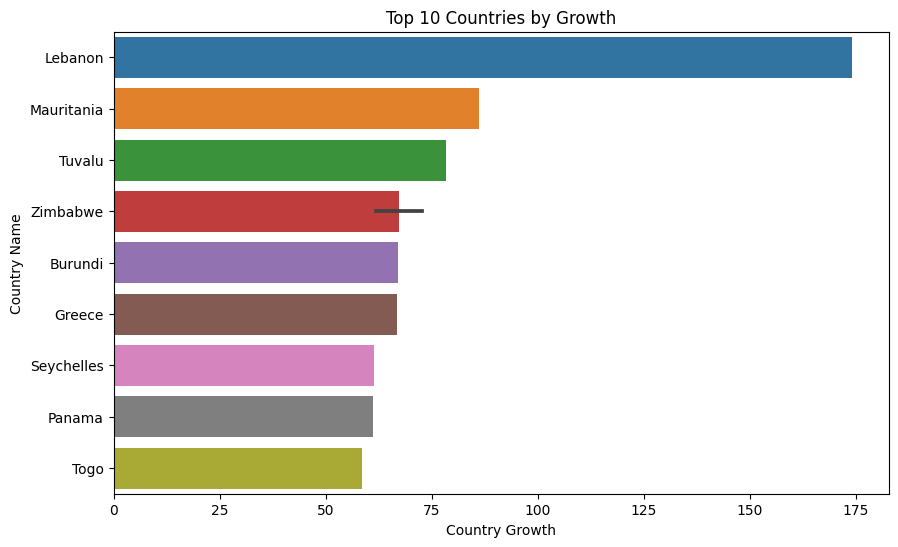

In [58]:
#Top N country in World Growth (%)
top_n = 10

top_countries = df3.sort_values(by=['World Growth (%)'], ascending=False).head(top_n)
    
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x="World Growth (%)", y="Partner Name", data=top_countries)
plt.xlabel("Country Growth")
plt.ylabel("Country Name")
plt.title(f"Top {top_n} Countries by Growth")
plt.show()

In [59]:
df3.sort_values(by=['World Growth (%)'], ascending=False).head(top_n)

,Partner Name,Year,Export (US$ Thousand),World Growth (%),AHS Simple Average (%),AHS Weighted Average (%),AHS Dutiable Tariff Lines Share (%),AHS Specific Tariff Lines Share (%),AHS AVE Tariff Lines Share (%),AHS MaxRate (%),...,AHS Duty Free Imports (US$ Thousand),MFN Simple Average (%),MFN Weighted Average (%),MFN Total Tariff Lines,MFN Dutiable Tariff Lines Share (%),MFN Duty Free Tariff Lines Share (%),MFN Specific Tariff Lines Share (%),MFN AVE Tariff Lines Share (%),MFN MaxRate (%),MFN Duty Free Imports (US$ Thousand)
6980,Lebanon,2017,27554660.73,174.00,3.27,1.94,12.65,1.19,9.54,3000.00,...,359265.94,9.50,8.50,760086.0,69.44,22.21,10.73,99.31,3000.0,44.33
3813,Mauritania,2004,1406629.34,86.22,5.70,1.97,17.59,0.08,0.16,145.00,...,727900.18,11.65,7.33,185227.0,74.54,19.91,33.60,130.02,3000.0,0.00
3397,Tuvalu,2002,493815.71,78.29,0.22,1.23,0.80,0.00,0.53,104.14,...,509040.61,15.71,17.90,319780.0,76.07,13.91,30.47,290.60,3000.0,0.00
5125,Zimbabwe,2009,2676801.48,72.61,3.04,9.50,18.84,0.23,0.93,567.27,...,209216.15,9.79,14.42,588236.0,70.77,23.74,44.18,227.94,3000.0,0.00
5396,Burundi,2011,484909.87,67.06,1.03,1.54,9.62,0.25,0.00,90.00,...,44919.75,11.17,17.81,273624.0,69.25,21.60,287.00,769.70,3000.0,0.00
7937,Greece,2021,72209036.25,66.83,4.46,5.16,35.68,0.29,3.99,1412.40,...,522638.45,8.98,10.85,1210111.0,68.67,24.76,5.87,75.19,3000.0,0.00
3907,Zimbabwe,2004,1892407.44,61.77,6.87,9.19,22.20,0.57,7.14,557.09,...,357721.83,10.92,14.17,575854.0,71.30,21.93,38.98,214.40,3000.0,0.00
3628,Seychelles,2003,556550.96,61.39,4.54,1.78,11.11,0.20,12.28,295.09,...,39590.11,10.17,17.10,117196.0,71.34,22.47,17.57,145.31,3000.0,0.00
4321,Panama,2006,29535442.75,61.08,7.49,6.88,58.04,0.31,1.92,274.50,...,320639.16,9.99,10.08,1030564.0,73.72,22.00,10.92,66.80,3000.0,0.00
1734,Togo,1995,643395.16,58.54,11.38,5.41,27.43,1.57,13.24,1565.82,...,67017.31,17.41,9.91,32152.0,74.94,18.73,41.61,117.79,3000.0,0.00
